In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
%pwd

'/Users/worakanlasudee/Documents/Schoolsat'

In [13]:
original_image = cv2.imread("Slide1_pre.png")


In [14]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


In [20]:
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [21]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [22]:
with open('res.txt', 'w') as f:
    for item in center:
        f.write("%s\n" % item)

In [23]:
checked = []
for i in range(len(res)):
    if res[i].any() in checked:
        continue
    else:
        print(res[i].any())
        checked.append(res[i].any())

True


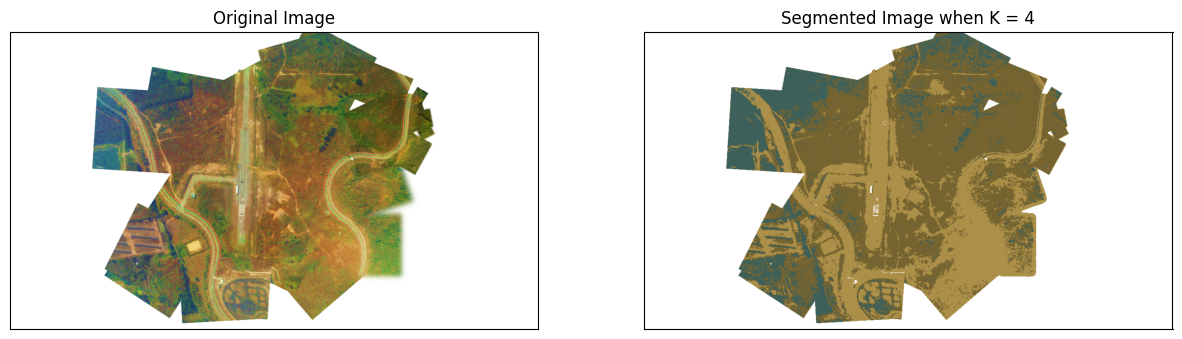

In [24]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


In [25]:
result_image.shape

(720, 1280, 3)

In [26]:
print(type(res))

<class 'numpy.ndarray'>


In [33]:
each_area = []
unique, counts = np.unique(res, return_counts=True)
for i in counts:
    if i not in each_area:
        each_area.append(i)
print(each_area)
dict(zip(unique, counts))
total = sum(each_area)

[209254, 68547, 139694, 1512315]


In [35]:
print(each_area)
print({209254*100/total})
print(68547*100/total)
print(139694*100/total)
print(1512315*100/total)

[209254, 68547, 139694, 1512315]
{10.843243635383795}
3.5520077106036347
7.238743710520724
78.36600494349184


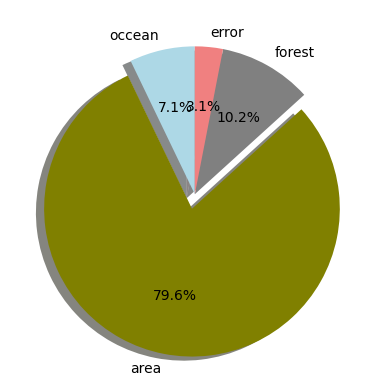

In [37]:
import matplotlib.pyplot as plt
explode = (0,0.1, 0,0)
labels = 'occean', 'area','forest','error'
sizes = [7, 78, 10, 3]
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors= ['lightblue', 'olive', 'gray', 'lightcoral'],
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, startangle=90)
plt.show()